# House Price Prediction - Advanced Regression

## Business Objective:
>A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Data Sourcing and Exploration

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

%matplotlib inline


pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',200)
pd.set_option('float_format', '{:f}'.format)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Importing the data

housing = pd.read_csv("train.csv")

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Getting shape and info of the data
print(housing.shape)
print('\n')
print(housing.info())
housing_original_shape = housing.shape

(1460, 81)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st   

In [4]:
#Exploring numerical parameters of data
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

Checking the info, some columns are categories but identified as continuous in the dataset. Let's change those.

In [5]:
housing[['OverallQual','MSZoning','OverallCond','MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']] = housing[['OverallQual','MSZoning','OverallCond','MSSubClass','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']].astype('category')

There are many columns which have 'NA' as specific category but identified as missing values by pandas. Let's impute those values with respective categories.

In [6]:
#Replacing NA values with respective categorical value of each column
housing.Alley = housing.Alley.replace(np.nan,'NoAlleyAccess')
housing.MasVnrType = housing.MasVnrType.replace(np.nan,'None')
housing.BsmtQual = housing.BsmtQual.replace(np.nan,'Gd')
housing.BsmtExposure = housing.BsmtExposure.replace(np.nan,'NoBasement')
housing.BsmtFinType1 = housing.BsmtFinType1.replace(np.nan,'NoBasement')
housing.BsmtFinType2 = housing.BsmtFinType2.replace(np.nan,'NoBasement')
housing.FireplaceQu = housing.FireplaceQu.replace(np.nan,'NoFireplace')
housing.GarageType = housing.GarageType.replace(np.nan,'NoGarage')
housing.GarageFinish = housing.GarageFinish.replace(np.nan,'NoGarage')
housing.GarageQual = housing.GarageQual.replace(np.nan,'NoGarage')
housing.GarageCond = housing.GarageCond.replace(np.nan,'NoGarage')
housing.PoolQC = housing.PoolQC.replace(np.nan,'NoPool')
housing.Fence = housing.Fence.replace(np.nan,'NoFence')
housing.MiscFeature = housing.MiscFeature.replace(np.nan,'None')

In [7]:
#Grouping categorical values of respective columns to reduce dummy variables
print(housing.Condition1.value_counts())
housing.Condition1 = housing.Condition1.replace(['Feedr','Artery','RRAn','RRAn','PosN','RRAe','PosA','RRNn','RRNe'],'Others')


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


In [8]:
#Imputing missing values of numerical columns with median
housing.LotFrontage = housing.LotFrontage.replace(np.nan,housing.LotFrontage.median())
housing.MasVnrArea = housing.MasVnrArea.replace(np.nan,housing.MasVnrArea.median())

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st   

Many columns have very high imbalance in categorical columns so we cannot get much information from it. Let's drop those too.

In [10]:
#Dropping columns with high skewness
housing = housing.drop(['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','PoolQC'], axis=1)

In [11]:
housing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Alley               3
LotShape            4
LandContour         4
LotConfig           5
Neighborhood       25
Condition1          2
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
HeatingQC           5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenQual         4
TotRmsAbvGrd       12
Fireplaces          4
FireplaceQ

`Id` column has all unique values. We can remove that.

In [12]:
housing = housing.drop(['Id'], axis=1)

In [13]:
#Getting numerical columns 
num_columns = list(housing.select_dtypes(exclude=['object','category']).columns)
num_columns

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

Let's consider zero values as null values for all numerical columns

In [14]:
housing[num_columns] = housing[num_columns].replace(0,np.nan)

#### Checking the missing values of all columns

In [15]:
#Checking the columns percentage of missing values
round(100*housing.isnull().sum().sort_values(ascending=False) / len(housing),2)

PoolArea        99.520000
3SsnPorch       98.360000
LowQualFinSF    98.220000
MiscVal         96.440000
ScreenPorch     92.050000
BsmtFinSF2      88.560000
EnclosedPorch   85.750000
MasVnrArea      59.520000
2ndFlrSF        56.780000
WoodDeckSF      52.120000
OpenPorchSF     44.930000
BsmtFinSF1      31.990000
BsmtUnfSF        8.080000
GarageArea       5.550000
GarageYrBlt      5.550000
TotalBsmtSF      2.530000
ExterQual        0.000000
ExterCond        0.000000
YearRemodAdd     0.000000
Foundation       0.000000
MasVnrType       0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofStyle        0.000000
SalePrice        0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BsmtExposure     0.000000
BldgType         0.000000
Condition1       0.000000
Neighborhood     0.000000
LotConfig        0.000000
LandContour      0.000000
LotShape         0.000000
Alley            0.000000
LotArea          0.000000
LotFrontage 

Let's drop all the columns with more than **`30%`** missing values and again checking for missing values

In [16]:
missing = round(100*(housing.isnull().sum()/len(housing.index)),2)
missing_col = missing[missing > 30].index
housing= housing.drop(missing_col,axis=1)
round(100*(housing.isnull().sum().sort_values(ascending=False)/len(housing.index)),2).head()

BsmtUnfSF     8.080000
GarageArea    5.550000
GarageYrBlt   5.550000
TotalBsmtSF   2.530000
OverallCond   0.000000
dtype: float64

- We can impute `BsmtUnfSF` with median value.
- It's not possible for `GarageArea and GarageYrBlt` as these missing values are nothing but the houses with no garages. We should drop those.

In [17]:
housing.BsmtUnfSF = housing.BsmtUnfSF.replace(np.nan, housing.BsmtUnfSF.median())
housing.TotalBsmtSF = housing.TotalBsmtSF.replace(np.nan, housing.TotalBsmtSF.median())
housing = housing.dropna(axis=0)
housing.shape

(1379, 55)

In [18]:
round(100*(housing.isnull().sum().sort_values(ascending=False)/len(housing.index)),2).head()

SalePrice      0.000000
OverallCond    0.000000
BsmtExposure   0.000000
BsmtQual       0.000000
Foundation     0.000000
dtype: float64

We don't have missing values anymore.

Year columns does not make sense in the data. We can derive the age of the particular columns instead and drop year columns

In [19]:
housing['BuiltAge'] = (max(housing['YearBuilt']) - housing['YearBuilt'])
housing['AgeAtSale'] = (max(housing['YrSold']) - (housing['YrSold']))
housing['LastRemod'] = (max(housing['YearRemodAdd']) - housing['YearRemodAdd'])
housing['GarageAgeAtSale'] = (max(housing['GarageYrBlt']) - housing['GarageYrBlt']).astype(int)

housing = housing.drop(['YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt'], axis=1)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,BuiltAge,AgeAtSale,LastRemod,GarageAgeAtSale
0,60,RL,65.000000,8450,NoAlleyAccess,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,150.000000,856.000000,Ex,856,1710,1,2,1,3,Gd,8,0,NoFireplace,Attchd,RFn,2,548.000000,TA,TA,Y,NoFence,None,WD,Normal,208500,7,2,7,7
1,20,RL,80.000000,9600,NoAlleyAccess,Reg,Lvl,FR2,Veenker,Others,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,284.000000,1262.000000,Ex,1262,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460.000000,TA,TA,Y,NoFence,None,WD,Normal,181500,34,3,34,34
2,60,RL,68.000000,11250,NoAlleyAccess,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,434.000000,920.000000,Ex,920,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608.000000,TA,TA,Y,NoFence,None,WD,Normal,223500,9,2,8,9
3,70,RL,60.000000,9550,NoAlleyAccess,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,540.000000,756.000000,Gd,961,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642.000000,TA,TA,Y,NoFence,None,WD,Abnorml,140000,95,4,40,12
4,60,RL,84.000000,14260,NoAlleyAccess,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,490.000000,1145.000000,Ex,1145,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836.000000,TA,TA,Y,NoFence,None,WD,Normal,250000,10,2,10,10


#### Checking the correlation of all variables

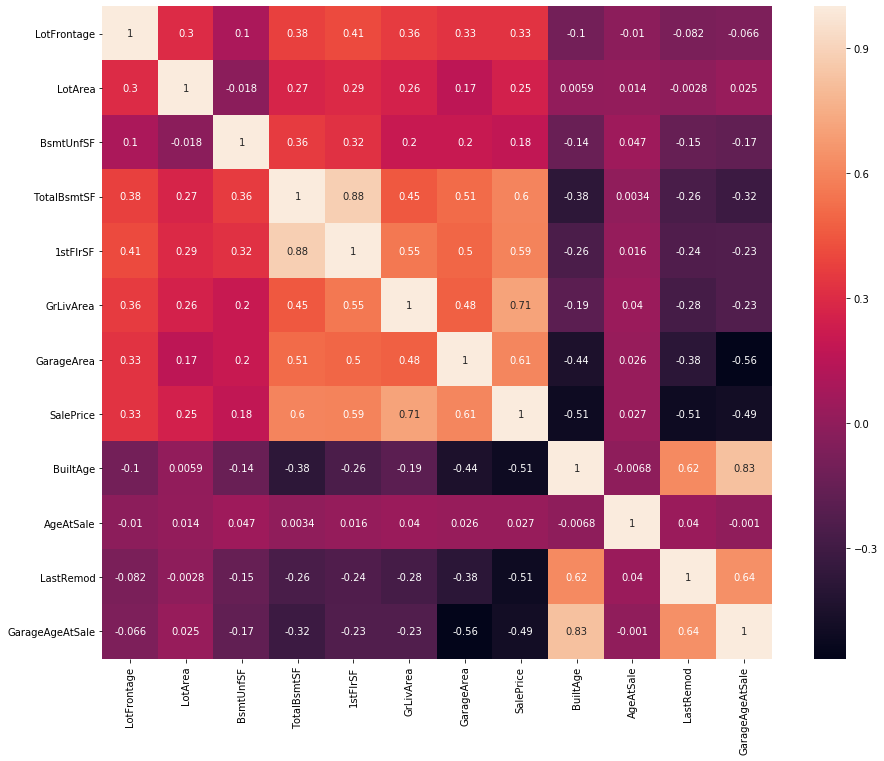

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(housing.corr(), annot=True)
plt.show()

Some variables have high correlations with each other. We will drop one variable of each between those pairs.

In [21]:
housing = housing.drop(['1stFlrSF','GarageAgeAtSale'], axis=1)

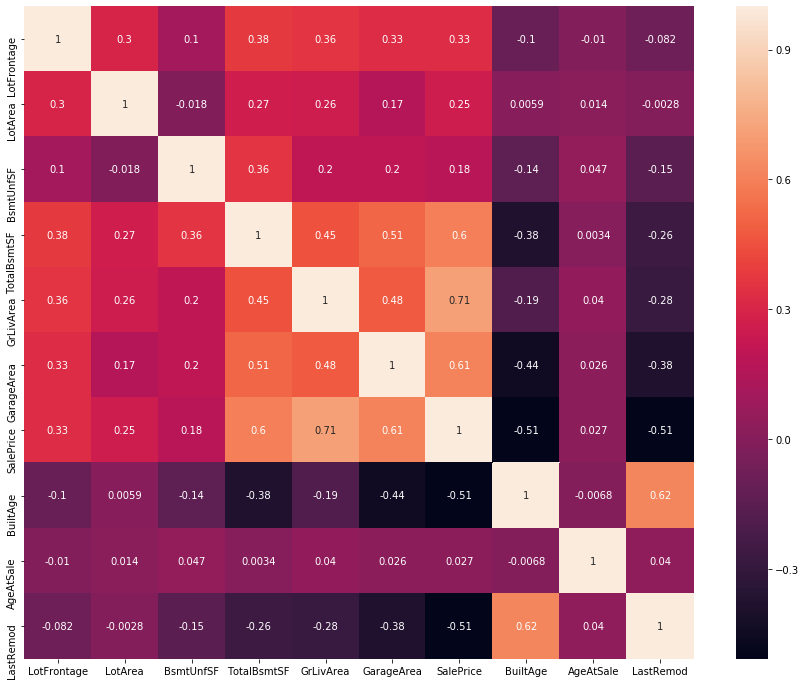

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(housing.corr(), annot=True)
plt.show()

In [23]:
#Getting categorical and numerical columns as lists
cat_columns = list(housing.select_dtypes(include=['object','category']).columns)
num_columns = list(housing.select_dtypes(exclude=['object','category']).columns)
print(len(cat_columns))
print(len(num_columns))

42
10


#### Checking for Normal Distribution of Target Variable

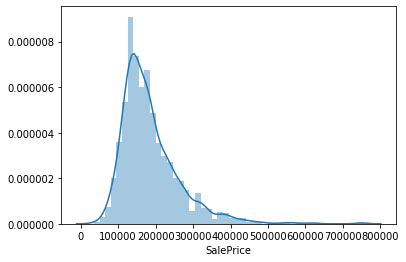

In [24]:
sns.distplot(housing['SalePrice'])


We can see the `SalePrice` is not normally distributed. It's skewed on left side. We can fix that if we convert all values into logarithmic values.

In [25]:
housing['SalePrice'] = np.log1p(housing["SalePrice"])

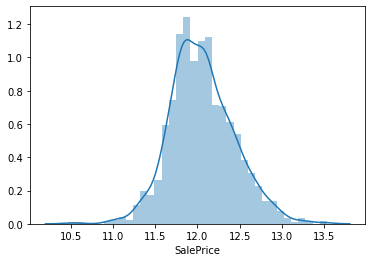

In [26]:
sns.distplot(housing['SalePrice'])

Now it's normally distributed.

### Outlier Treatment

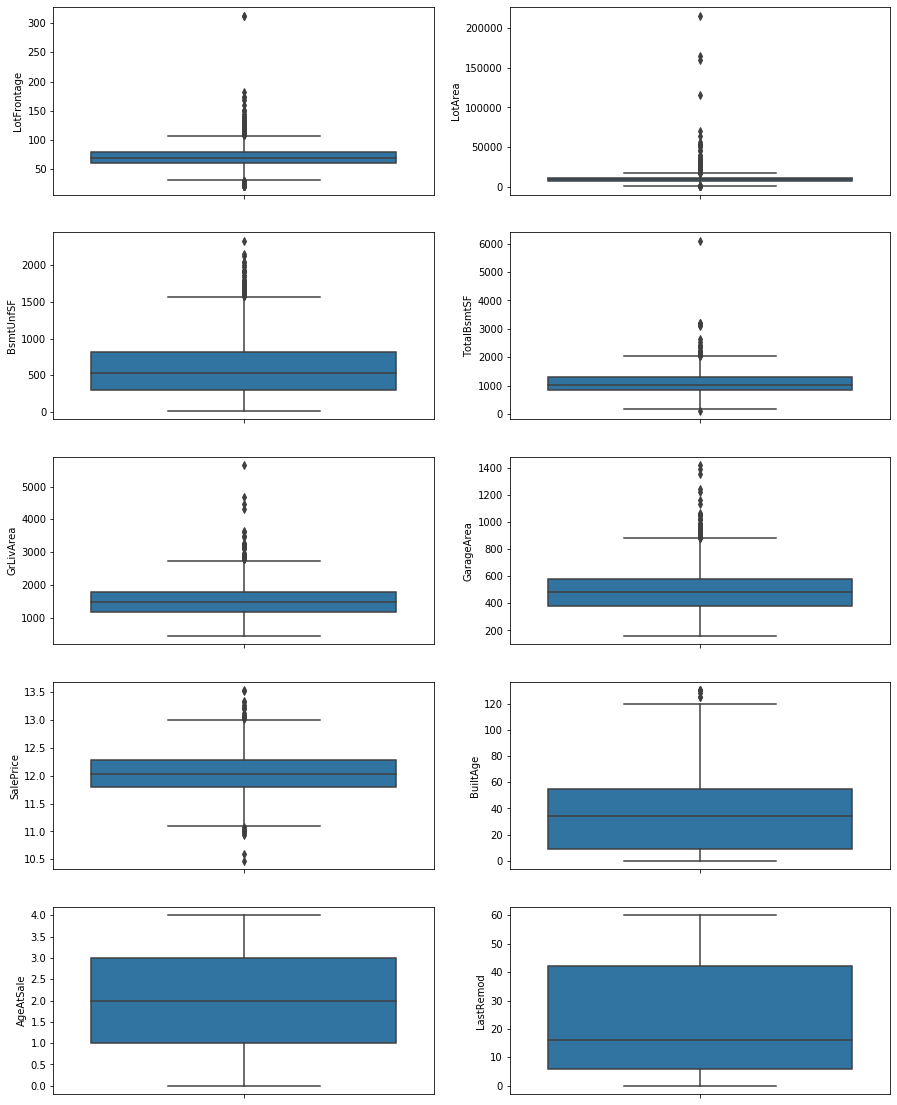

In [27]:
#Plotting the boxplot to identify the columns with outliers
plt.figure(figsize=(15,20))
for i,col in enumerate(num_columns):
    plt.subplot(5,2,i+1)
    sns.boxplot(data=housing,y=col)
    

Let's remove the outliers with IQR method 

In [28]:
#Removing the columns with no outliers from the list and applying IQR method on the rest
num_columns.remove('LastRemod')
num_columns.remove('AgeAtSale')
for col in num_columns:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1
    housing = housing[(housing[col] >= Q1 - (1.5 * IQR)) & (housing[col] <= Q3 + (1.5 * IQR))]

In [29]:
num_columns = list(housing.select_dtypes(exclude=['object','category']).columns)
num_columns

['LotFrontage',
 'LotArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'SalePrice',
 'BuiltAge',
 'AgeAtSale',
 'LastRemod']

In [30]:
print("Number of\nRows retained: {0}\nColumns retained: {1}\n\n".format(housing.shape[0], housing.shape[1]))
print("Percentage of\nRows retained: {0:.2f}\nColumns retained: {1:.2f}\n".format((housing.shape[0]/housing_original_shape[0])*100, (housing.shape[1]/housing_original_shape[1])*100))

Number of
Rows retained: 1090
Columns retained: 52


Percentage of
Rows retained: 74.66
Columns retained: 64.20



## Data Visualisation

### Continuous Data

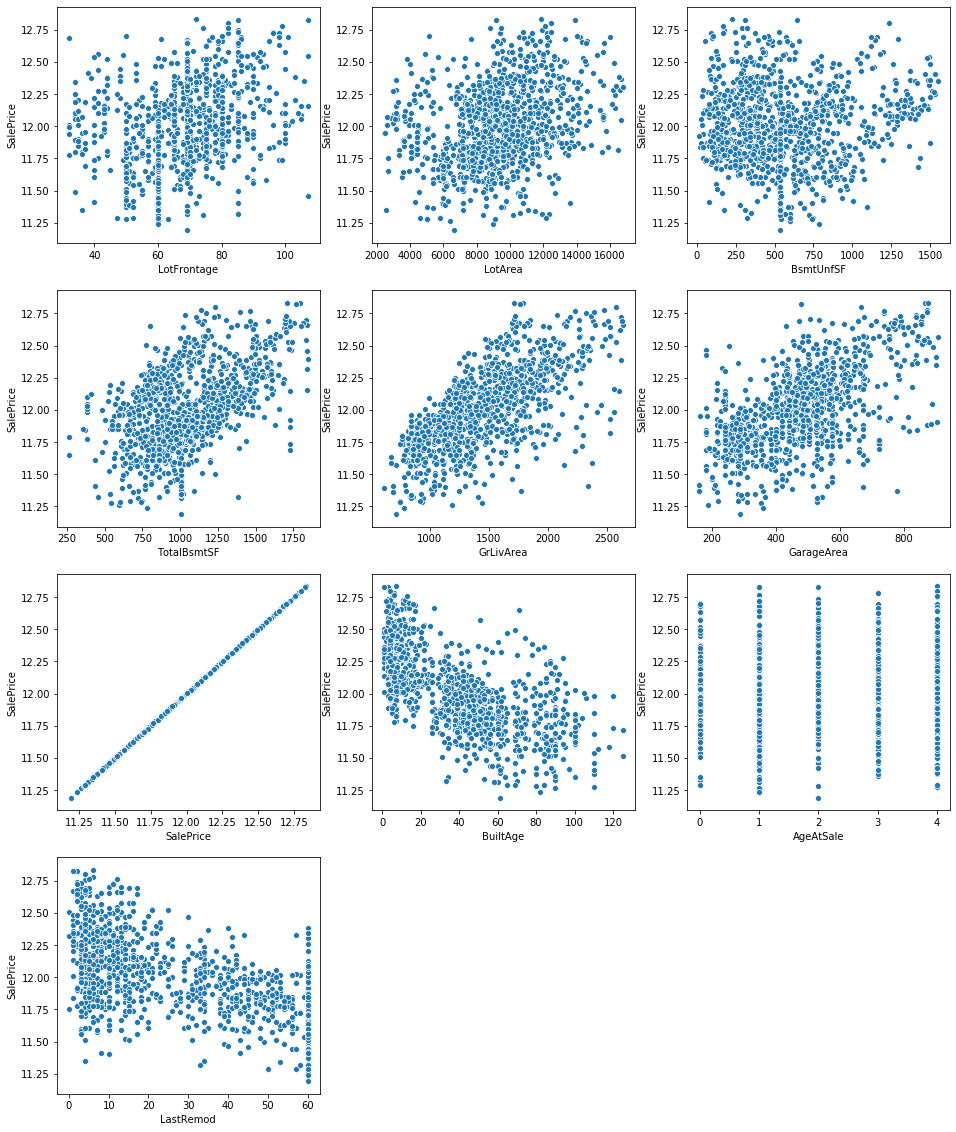

In [31]:
plt.figure(figsize=(16,20))
for i,col in enumerate(num_columns):    
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=housing,y ='SalePrice', x = col)
    

Almost all of the numerical features seems to follow linear relationship with `SalePrice` though there are some features which deviates a bit. Let's consider them to be linear for the model to be simple.

### Categorical Data

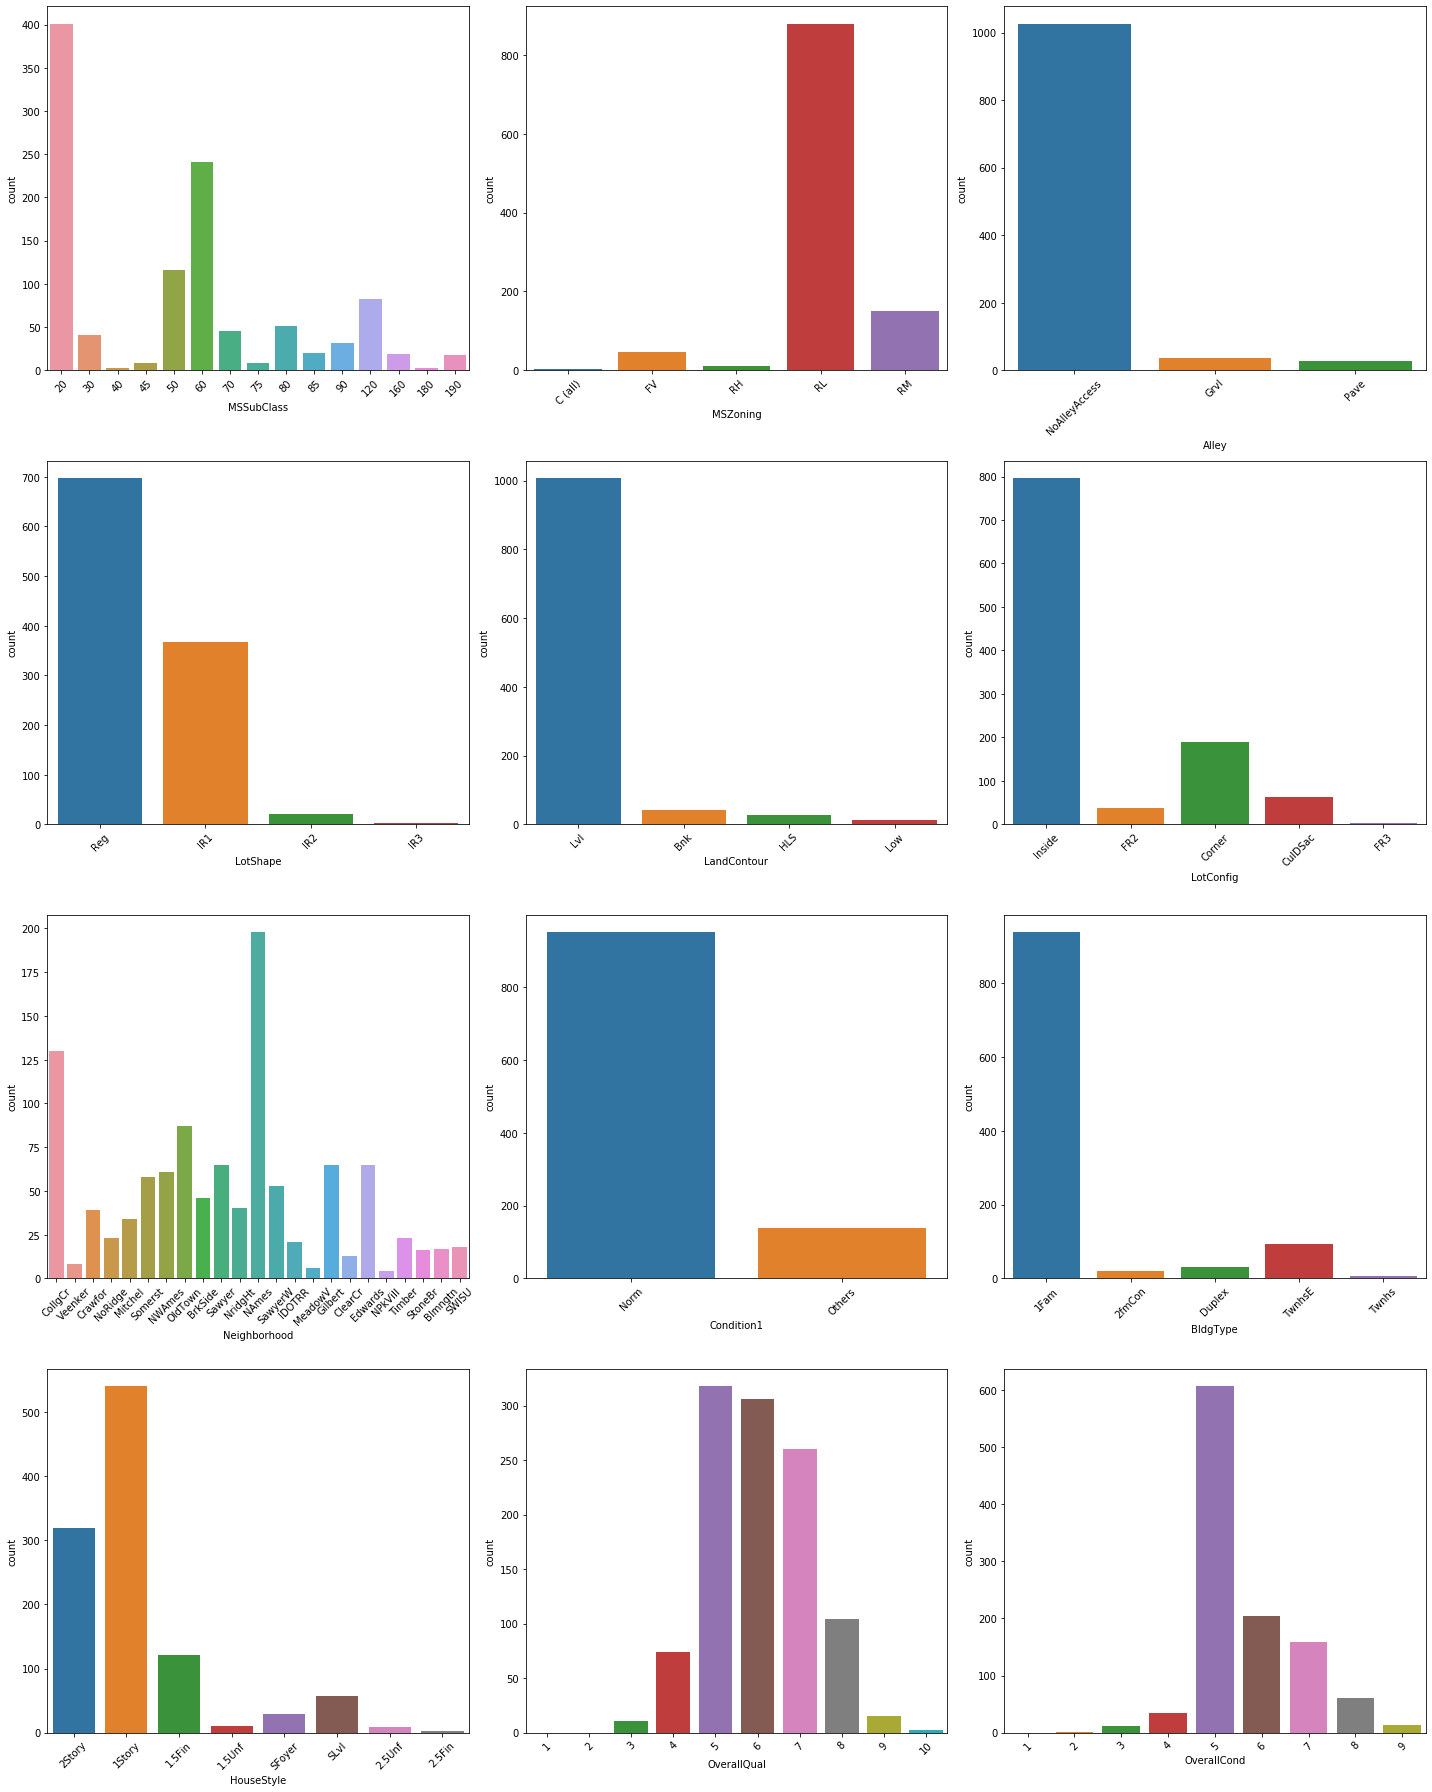

In [32]:
plt.figure(figsize=(20,25))
for i,col in enumerate(cat_columns[0:12]):
        plt.subplot(4,3,i+1)
        sns.countplot(data=housing, x = col)
        plt.xticks(rotation=45)
        plt.tight_layout()

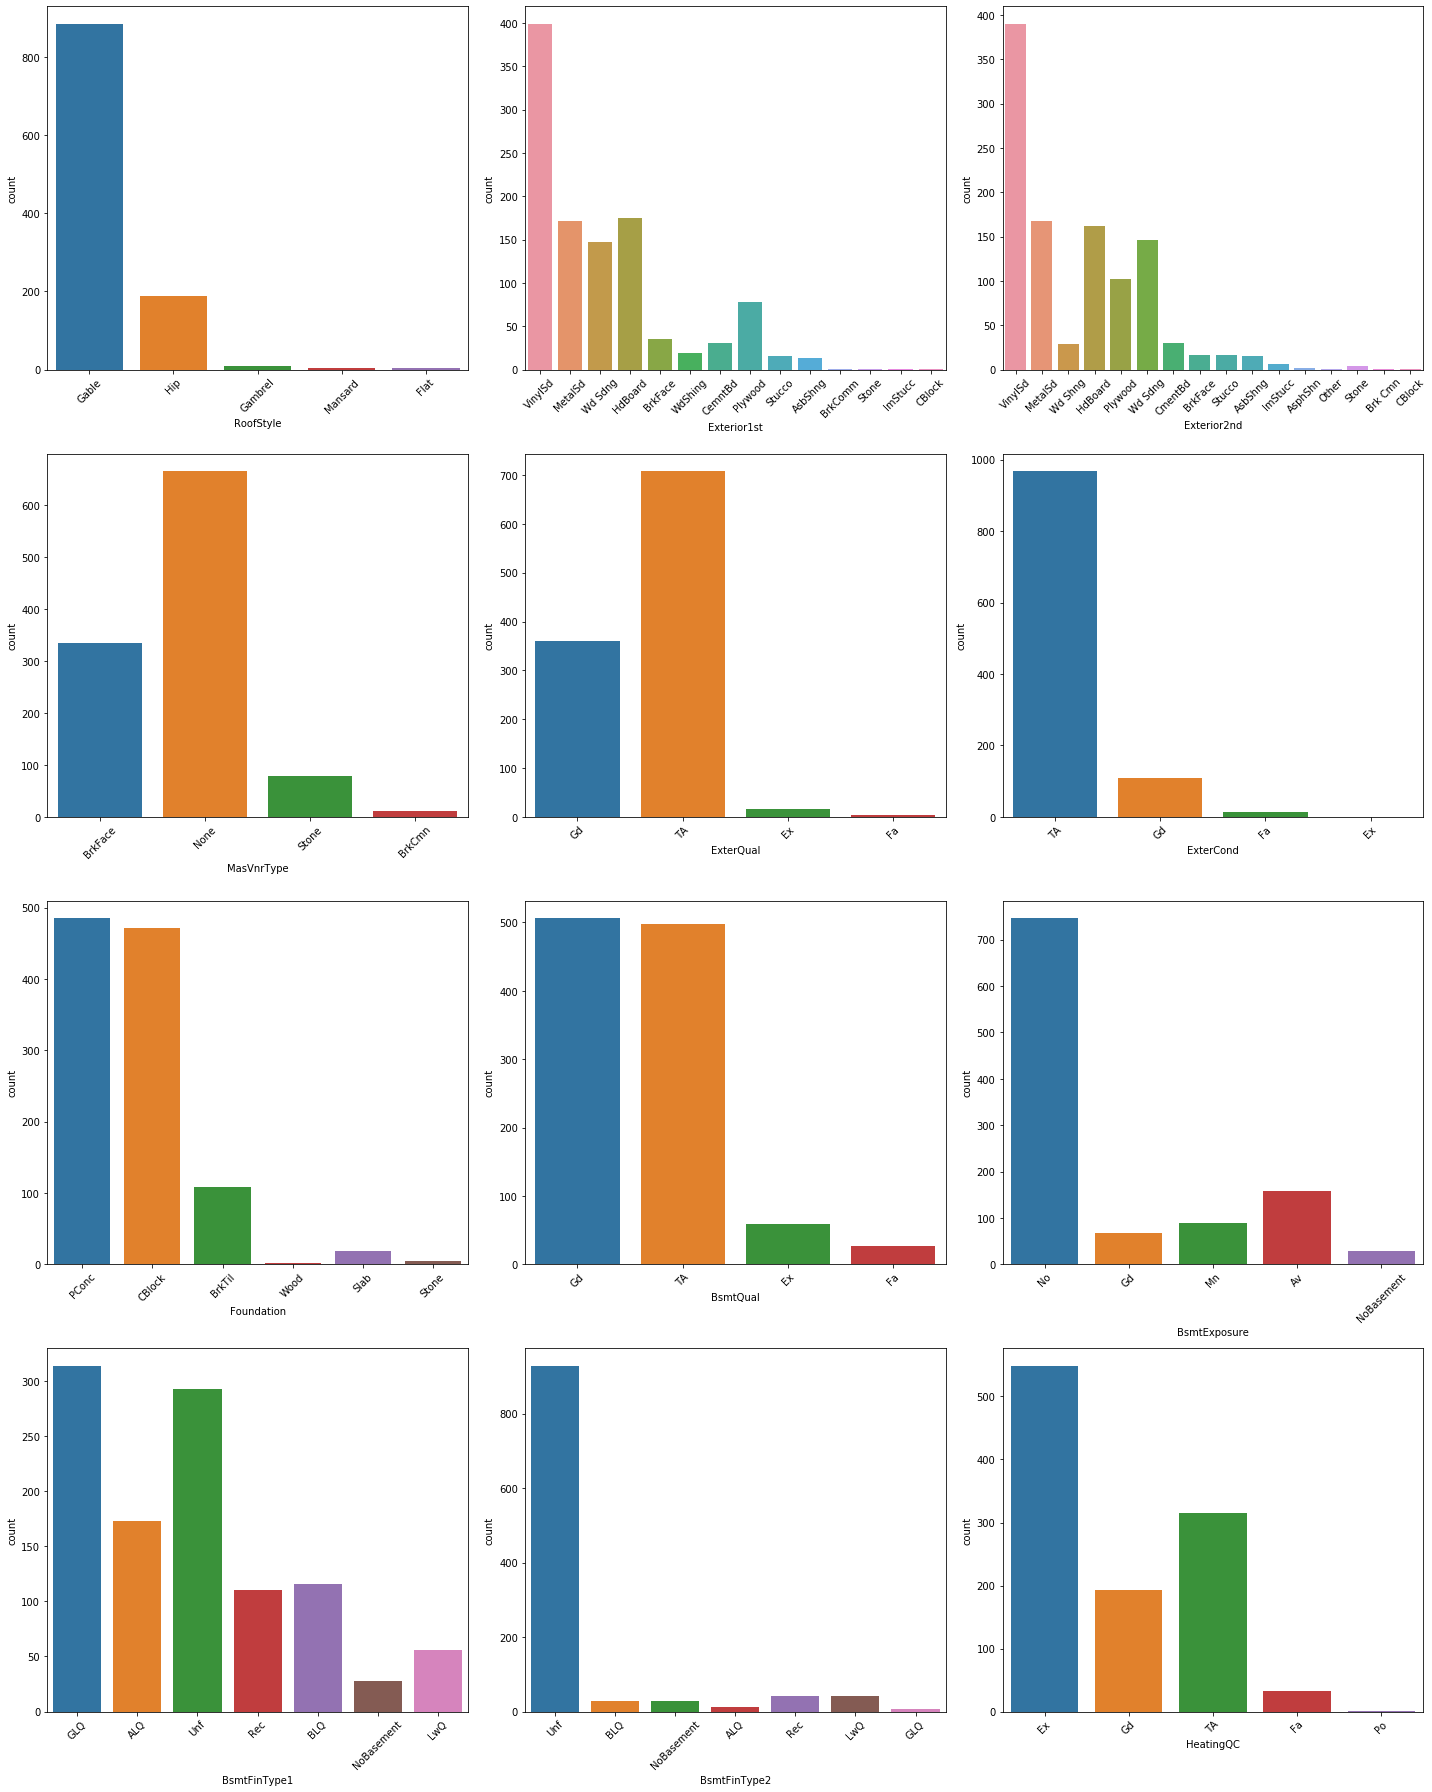

In [33]:
plt.figure(figsize=(20,25))
for i,col in enumerate(cat_columns[12:24]):
        plt.subplot(4,3,i+1)
        sns.countplot(data=housing, x = col)
        plt.xticks(rotation=45)
        plt.tight_layout()

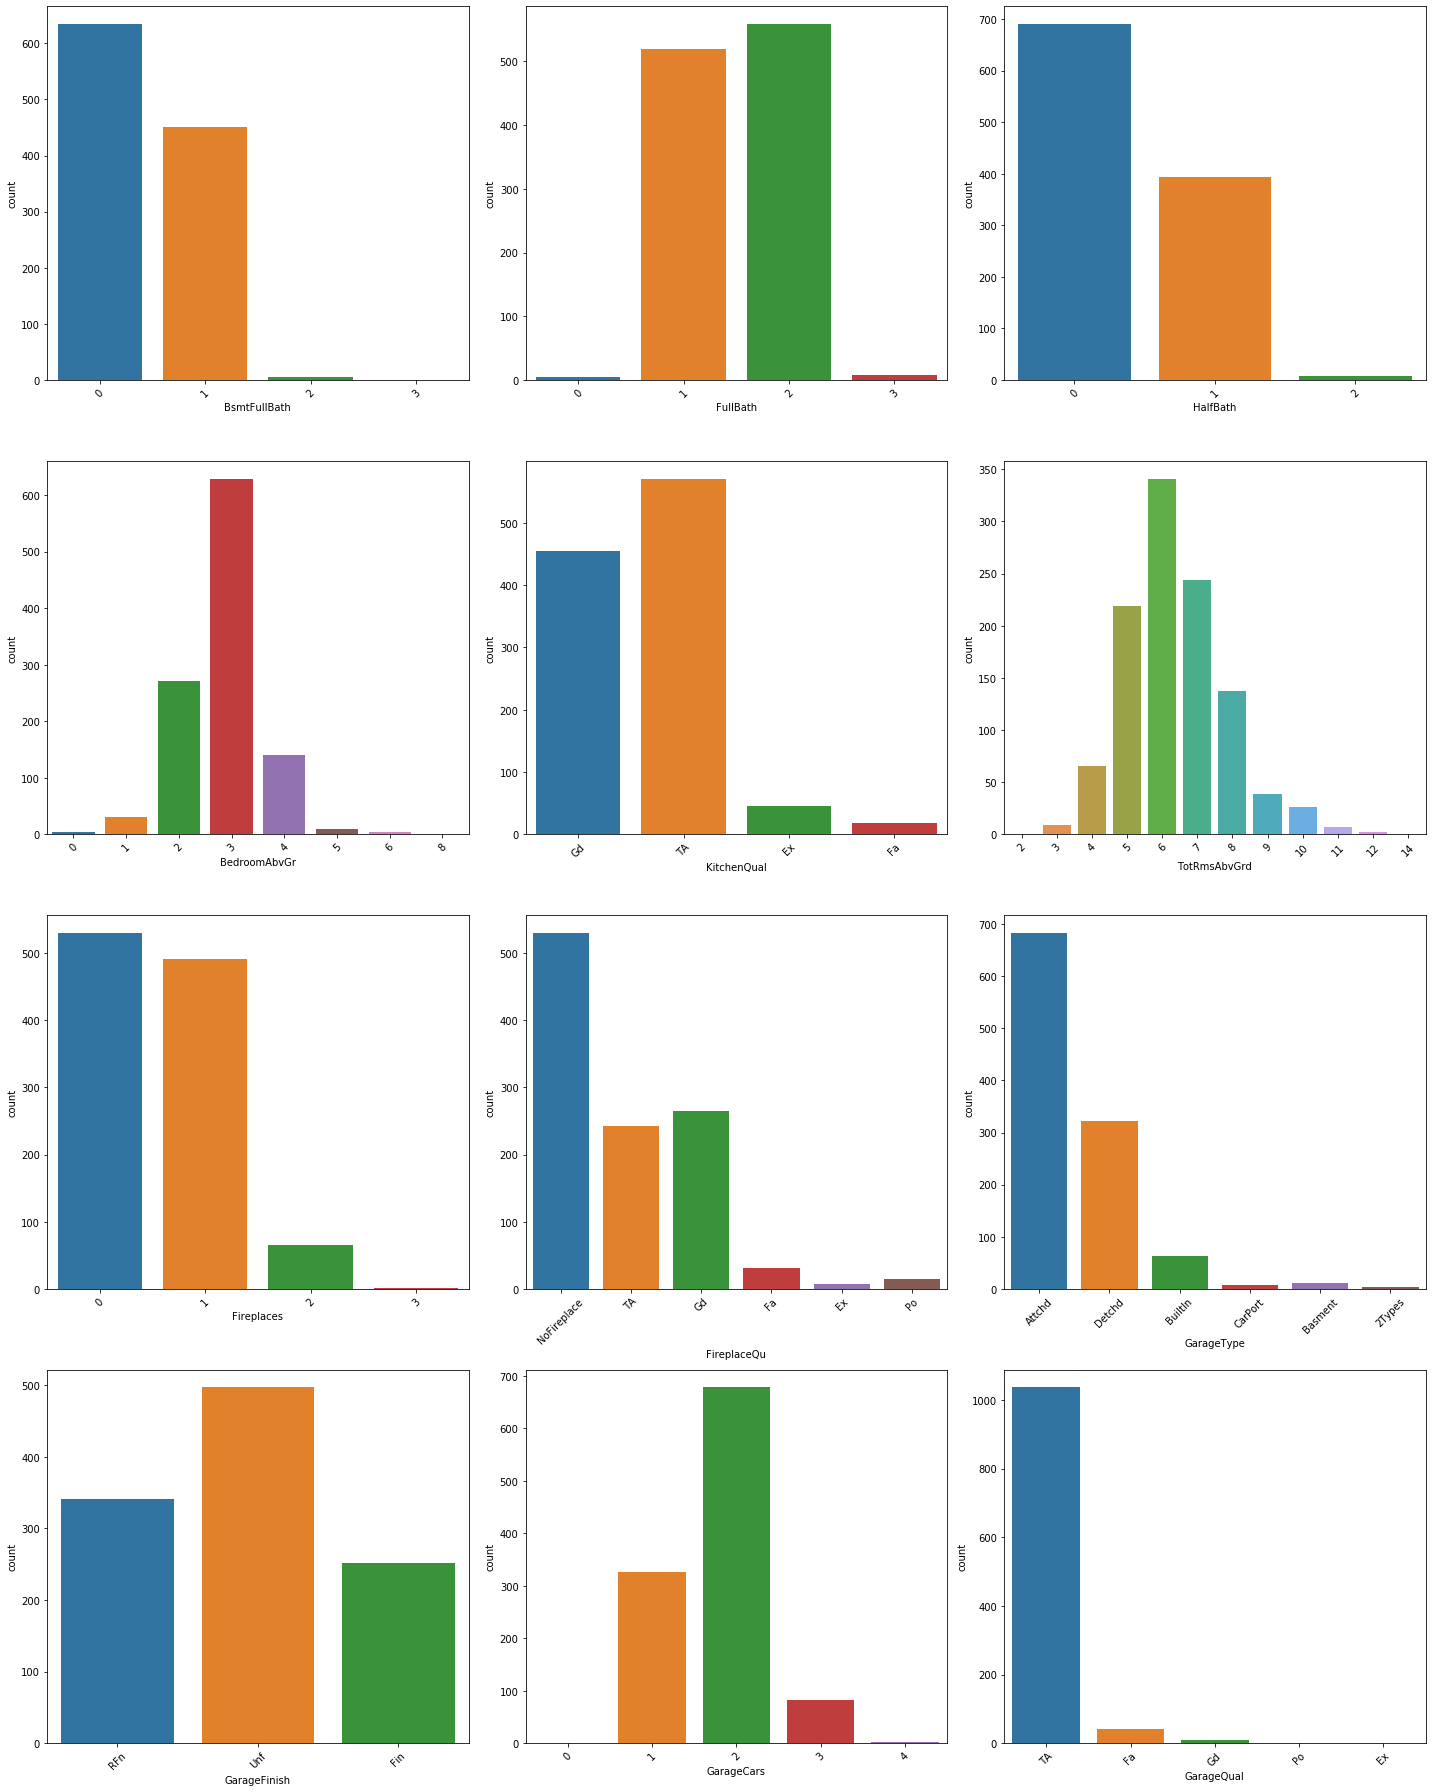

In [34]:
plt.figure(figsize=(20,25))
for i,col in enumerate(cat_columns[24:36]):
        plt.subplot(4,3,i+1)
        sns.countplot(data=housing, x = col)
        plt.xticks(rotation=45)
        plt.tight_layout()

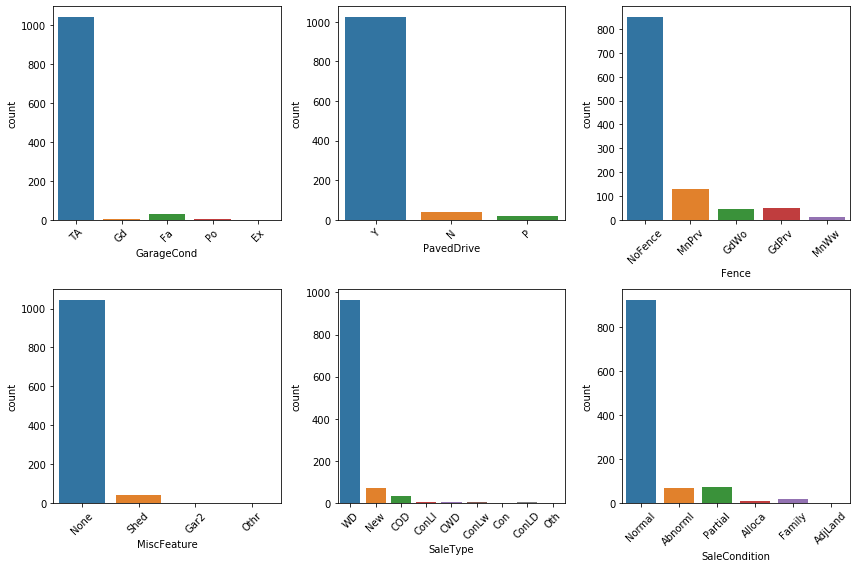

In [35]:
plt.figure(figsize=(12,8))
for i,col in enumerate(cat_columns[36:]):
        plt.subplot(2,3,i+1)
        sns.countplot(data=housing, x = col)
        plt.xticks(rotation=45)
        plt.tight_layout()

- Most of the plots show uniform distribution of all categorical values but there are still many columns with high imbalance because of the imputation of missing variables.
- Let's create the model and then check if any modification required

## Data Preparation

### Dummy Variables

Let's create the dummies for categorical columns

In [36]:
housing1 = pd.get_dummies(housing, drop_first =True)
housing1.shape

(1090, 238)

In [37]:
housing1.head()

,LotFrontage,LotArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,SalePrice,BuiltAge,AgeAtSale,LastRemod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.000000,8450,150.000000,856.000000,1710,548.000000,12.247699,7,2,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Normalisation

In [38]:
#Separating the target variable
X = housing1.copy()
y = X.pop('SalePrice')

In [39]:
# Scaling the data
scaler = StandardScaler()

scaler.fit(X)

print(X.shape)
print(y.shape)

(1090, 237)
(1090,)


### Train and Test Data Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [41]:
print(X_train.shape)
print(y_test.shape)

(763, 237)
(327,)


## Model Building

Let's first perform Ridge Regression

### Ridge Regression

We'll do the coarse hyperparameter tuning to get the optimal alpha value for Ridge regression model first

In [42]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [43]:
#Getting results of cross validation into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010993,0.001676,0.002398,0.000489,0.000100,{'alpha': 0.0001},-0.092501,-0.079943,-0.088276,-0.091451,-0.093926,-0.089211,0.005000,27,-0.045619,-0.048216,-0.048406,-0.046242,-0.045694,-0.046836,0.001225
1,0.011594,0.001743,0.002449,0.000843,0.001000,{'alpha': 0.001},-0.092007,-0.079965,-0.087815,-0.091321,-0.093759,-0.088964,0.004904,25,-0.045655,-0.048260,-0.048443,-0.046247,-0.045704,-0.046862,0.001235
2,0.008997,0.002188,0.001597,0.000491,0.010000,{'alpha': 0.01},-0.090222,-0.079786,-0.085349,-0.090211,-0.092407,-0.087585,0.004539,24,-0.045844,-0.048482,-0.048644,-0.046296,-0.045794,-0.047012,0.001279
3,0.008596,0.001020,0.001998,0.000001,0.050000,{'alpha': 0.05},-0.087220,-0.078239,-0.082117,-0.087271,-0.089144,-0.084789,0.004028,23,-0.046309,-0.048867,-0.048917,-0.046650,-0.046087,-0.047366,0.001259
4,0.008596,0.001623,0.001599,0.000491,0.100000,{'alpha': 0.1},-0.085179,-0.076994,-0.080547,-0.085383,-0.087165,-0.083045,0.003739,22,-0.046691,-0.049153,-0.049118,-0.047053,-0.046388,-0.047680,0.001206


In [44]:
#Finding the best alpha value from the cross validated parameters
model_cv.best_params_

{'alpha': 6.0}

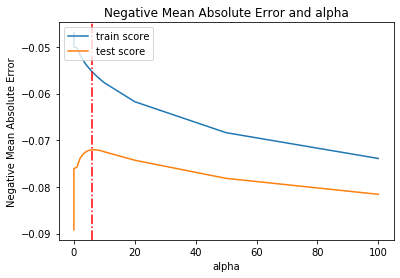

In [45]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.axvline(6.0,linestyle='-.',color='r')     #Plotting axis line having best alpha value for visualising
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Before we did a coarse tuning of the model, now let's perform fine tuning of the model to get the optimal value of alpha with precision.

In [46]:
# list of alphas to tune
params = {'alpha': np.arange(4,8,0.1)}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
#Again getting results into dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=8]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009997,0.002757,0.001797,0.000748,4.000000,{'alpha': 4.0},-0.076088,-0.067601,-0.072889,-0.067148,-0.078423,-0.072429,0.004485,40,-0.052631,-0.054749,-0.054771,-0.054461,-0.052292,-0.053781,0.001088
1,0.007797,0.000399,0.001598,0.000489,4.100000,{'alpha': 4.1},-0.076091,-0.067535,-0.072891,-0.067035,-0.078394,-0.072388,0.004518,39,-0.052710,-0.054836,-0.054850,-0.054560,-0.052373,-0.053866,0.001091
2,0.006998,0.000001,0.001397,0.000489,4.200000,{'alpha': 4.199999999999999},-0.076094,-0.067471,-0.072895,-0.066928,-0.078366,-0.072350,0.004551,38,-0.052790,-0.054921,-0.054931,-0.054656,-0.052454,-0.053950,0.001094
3,0.010395,0.002056,0.001997,0.001095,4.300000,{'alpha': 4.299999999999999},-0.076097,-0.067410,-0.072902,-0.066831,-0.078340,-0.072315,0.004581,37,-0.052870,-0.055004,-0.055011,-0.054750,-0.052533,-0.054034,0.001097
4,0.007397,0.001019,0.001798,0.000400,4.400000,{'alpha': 4.399999999999999},-0.076100,-0.067351,-0.072911,-0.066740,-0.078322,-0.072284,0.004611,36,-0.052949,-0.055087,-0.055090,-0.054842,-0.052610,-0.054116,0.001100


In [48]:
model_cv.best_params_

{'alpha': 6.499999999999991}

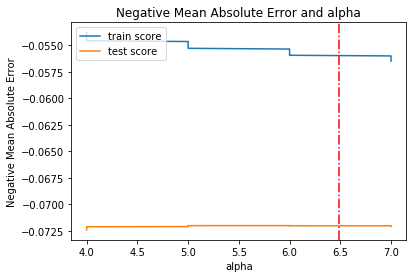

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.axvline(6.49,linestyle='-.',color='r')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

As we can see we found our precise alpha value as **`6.499`**. Let's build a model and find the predicting variables

In [50]:
#Applying ridge regression on optimal value of alpha and predicting on test data
ridge = Ridge(alpha=6.499)

ridge.fit(X_train, y_train)
print("R-squared value for train data:", format(r2_score(y_train, ridge.predict(X_train))))
print("R-squared value for test data:", format(r2_score(y_test, ridge.predict(X_test))))

R-squared value for train data: 0.937003128535956
R-squared value for test data: 0.9090863382567457


We have got `0.937` R-squared value for train data and `0.909` for test data which shows our model is working significantly.

In [51]:
#Forming a dataframe with variables with respective coefficients alongwith the constant
ridge_coefficients = pd.DataFrame(list(zip(X.columns,ridge.coef_)), columns=['Feature', 'Coefficient'])
ridge_coefficients = ridge_coefficients.append({'Feature':'constant','Coefficient':ridge.intercept_},ignore_index=True)
ridge_coefficients.head()

,Feature,Coefficient
0,LotFrontage,0.000578
1,LotArea,0.000006
2,BsmtUnfSF,-0.000076
3,TotalBsmtSF,0.000136
4,GrLivArea,0.000270


__Top 10 features/categories which has positive effect on SalePrice are:__

In [68]:
ridge_coefficients.sort_values(by='Coefficient',ascending=False).head(11)                       

,Feature,Coefficient
237,constant,11.532028
42,Neighborhood_Crawfor,0.096831
80,OverallQual_9,0.087307
89,OverallCond_9,0.076572
79,OverallQual_8,0.063910
87,OverallCond_7,0.056195
95,Exterior1st_BrkFace,0.055534
88,OverallCond_8,0.046089
57,Neighborhood_Somerst,0.045802
139,BsmtExposure_Gd,0.045545


__Top 10 features/categories which has negative effect on SalePrice are:__

In [69]:
ridge_coefficients.sort_values(by='Coefficient',ascending=True).head(10)                             

,Feature,Coefficient
75,OverallQual_4,-0.083009
83,OverallCond_3,-0.076170
142,BsmtExposure_NoBasement,-0.062085
84,OverallCond_4,-0.060826
152,BsmtFinType2_NoBasement,-0.055934
146,BsmtFinType1_NoBasement,-0.055934
43,Neighborhood_Edwards,-0.055407
176,KitchenQual_TA,-0.049544
20,MSSubClass_160,-0.049502
175,KitchenQual_Gd,-0.047054


`Neighborhood`, `Overall Quality`, `Overall Condition` and houses with `No Basement` are the important features according to the Ridge regression. Let's also check with Lasso regression.

### Lasso Regression

In Lasso, we will only perform coarse hyperparameter tuning.

In [54]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
#Transforming cross-validation results in dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113335,0.040899,0.001599,0.000490,0.000100,{'alpha': 0.0001},-0.077567,-0.071073,-0.074202,-0.074808,-0.078539,-0.075234,0.002644,2,-0.049784,-0.051929,-0.051627,-0.050450,-0.049334,-0.050625,0.001011
1,0.017989,0.002190,0.001400,0.000490,0.001000,{'alpha': 0.001},-0.079602,-0.066793,-0.074239,-0.064399,-0.079076,-0.072825,0.006232,1,-0.062365,-0.064220,-0.063701,-0.064369,-0.062735,-0.063478,0.000798
2,0.007595,0.000489,0.001399,0.000489,0.010000,{'alpha': 0.01},-0.101758,-0.081576,-0.097729,-0.094881,-0.096977,-0.094581,0.006884,3,-0.091340,-0.095312,-0.092192,-0.092792,-0.091731,-0.092673,0.001405
3,0.007396,0.000800,0.001798,0.000400,0.050000,{'alpha': 0.05},-0.105566,-0.082665,-0.100777,-0.099632,-0.098917,-0.097507,0.007787,5,-0.094743,-0.099477,-0.095350,-0.095587,-0.095453,-0.096122,0.001702
4,0.007395,0.000489,0.001399,0.000489,0.100000,{'alpha': 0.1},-0.105189,-0.082614,-0.100904,-0.100126,-0.098722,-0.097506,0.007764,4,-0.094835,-0.099423,-0.095450,-0.095558,-0.095511,-0.096155,0.001655


In [56]:
model_cv.best_params_

{'alpha': 0.001}

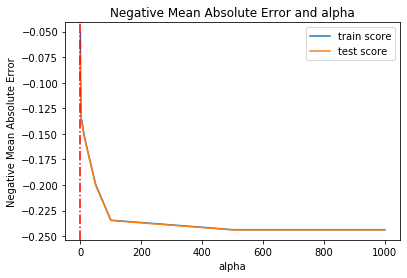

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.axvline(0.001,linestyle='-.',color='r')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In Lasso model, we got **`0.001`** optimal alpha value. Let's run the model with this value.

In [58]:
#Applying lasso regression on optimal value of alpha
lasso = Lasso(alpha=0.001)

lasso.fit(X_train, y_train)
print("R-squared value for train data:", format(r2_score(y_train, lasso.predict(X_train))))
print("R-squared value for test data:", format(r2_score(y_test, lasso.predict(X_test))))

R-squared value for train data: 0.9163627547018889
R-squared value for test data: 0.8966583540617421


Now, we have got less R-squared value for train data with `0.916` as well as `0.896` for test data

In [59]:
#Finding the number of variables selected by Lasso model and it's coefficient values
print(len(lasso.coef_[lasso.coef_!=0]))
lasso.coef_[lasso.coef_!=0]

72


array([ 5.65094623e-04,  6.56784158e-06, -8.04450016e-05,  1.77142045e-04,
        2.67900775e-04,  1.37238370e-04, -2.53081580e-03,  1.30965065e-03,
       -1.33295248e-03,  7.81217723e-03,  8.04177002e-04, -3.04516543e-02,
        4.40107438e-03, -3.09835017e-03, -2.41527086e-02, -1.13573324e-02,
        2.62185584e-03, -4.38890638e-03,  1.06818998e-01, -3.42540749e-02,
        3.39010847e-04, -8.10640293e-03,  4.46445455e-02, -3.40117415e-02,
       -5.24974647e-03, -7.33656860e-02, -2.54074763e-02,  4.88427271e-02,
        9.40263328e-02,  1.40657917e-01, -8.14095079e-02, -6.57945116e-02,
       -1.96931410e-02,  4.07230843e-02,  1.69307113e-02,  4.63311885e-02,
        3.79115971e-02, -8.05074825e-03,  3.42095450e-03,  1.99826822e-02,
        3.58546185e-03, -8.47244941e-03,  1.58238883e-02, -1.04498260e-02,
        3.77901619e-02, -8.39356544e-03, -9.26488756e-02,  2.68535094e-02,
       -3.34709663e-03, -3.99478763e-02, -3.79275684e-03,  7.44092616e-03,
       -1.25632708e-02, -

In [60]:
#Again forming a dataframe with variables with respective coefficients alongwith the constant
lasso_coefficients = pd.DataFrame(list(zip(X.columns,lasso.coef_[lasso.coef_!=0])), columns=['Feature', 'Coefficient'])
lasso_coefficients = lasso_coefficients.append({'Feature':'constant','Coefficient':lasso.intercept_},ignore_index=True)
lasso_coefficients.head()

,Feature,Coefficient
0,LotFrontage,0.000565
1,LotArea,0.000007
2,BsmtUnfSF,-0.000080
3,TotalBsmtSF,0.000177
4,GrLivArea,0.000268


__Top 10 features/categories which has positive effect on SalePrice are:__

In [71]:
lasso_coefficients.sort_values(by='Coefficient',ascending=False).head(11)   

,Feature,Coefficient
72,constant,11.453611
29,LotShape_IR2,0.140658
18,MSSubClass_90,0.106819
28,Alley_Pave,0.094026
27,Alley_NoAlleyAccess,0.048843
35,LotConfig_CulDSac,0.046331
22,MSSubClass_190,0.044645
33,LandContour_Low,0.040723
71,HouseStyle_SFoyer,0.039129
36,LotConfig_FR2,0.037912


__Top 10 features/categories which has negative effect on SalePrice are:__

In [72]:
lasso_coefficients.sort_values(by='Coefficient',ascending=True).head(10)   

,Feature,Coefficient
46,Neighborhood_MeadowV,-0.092649
30,LotShape_IR3,-0.081410
25,MSZoning_RL,-0.073366
31,LotShape_Reg,-0.065795
49,Neighborhood_NPkVill,-0.039948
69,HouseStyle_2.5Unf,-0.035012
19,MSSubClass_120,-0.034254
23,MSZoning_FV,-0.034012
65,BldgType_TwnhsE,-0.032334
11,MSSubClass_45,-0.030452


`Lot Shape (Property Shape)`, `MSSubClass (Type of dwelling in sale)`, `Alley access`, `Lot Configuration`, `Neighborhood` and `MSZoning (Zoning Classification)` are the important features according to the Lasso regression

### Conclusion

From the results obtained, 
- **`Ridge`** has generalized better with improved R-squared for test as well as train data as compared to `Lasso`. 
- Eventhough Lasso has reduced the number of features from `237` to `72`, it has failed to perform well overall.
- The optimal value of alpha for Lasso regression is **`0.001`** and **`6.499`** for Ridge regression.

### Company requirements

The company wants to know:

**Which variables are significant in predicting the price of a house**

The price of the house is significantly affecting due to the following variables: -
1. Neighbourhood
2. Overall quality
3. Overall condition
4. Exterior covering on the house
5. Basement exposure
6. Houses with no basement
7. Kitchen Quality

**How well those variables describe the price of a house**

- The sale prices of the houses are very high if the neighbourhood is in the Crawford or Somerset location, have excellent or very good overall quality,have the overall condition of the house is excellent, very good or even good, also if the exterior covering is with brick face and if the basement has good exposure.
- The sale prices of the houses are very low if the house's overall quality is below average, overall condition is fair or below average,has no basement, neighborhoud is in Edwards location and if the kitchen quality is good or typical.

### Reccomendations for the company 

- The company should invest in the houses with low price, change the condition and quality of the house according to the houses with high price and then sell the houses with high price.
- This way the company can yield high returns and the investment will turn into profit.